In [1]:
from __future__ import print_function, division, absolute_import
import os,sys
import numpy as np
from scipy.linalg import inv, block_diag
import time
from joblib import Parallel, delayed
import gudhi
sys.path.insert(0, "C:\\Users\\matt\\Desktop\\orbithunter\\")
from orbithunter import *
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
import itertools
from gudhi.hera import wasserstein_distance, bottleneck_distance
import glob

In [2]:
merge_tile = read_h5('RelativeOrbitKS_L13p026_T15p855.h5', directory='../data/tiles/original')

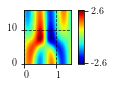

In [3]:
merge_tile.plot()

In [4]:
result = converge(rediscretize(merge_tile, new_shape=(32,32)), verbose=True, precision='machine')

Starting gradient descent. Initial residual=0.09579012475584053, target=1e-15, max_iter=16384
#Gradient descent has stalled; exiting. Decrease ftol to avoid this behavior.
Starting lstsq. Initial residual=2.3081471582898367e-08, target=1e-15
00
Converged. exiting with residual 1.2172231824596696e-20


In [5]:
merge_tile = result.orbit

In [6]:
continuation_endpoint_plus = dimension_continuation(merge_tile, step_size=0.001, target_extent=20, axis=1, method='lstsq',
                                               save=True, directory='../data/continuation/merge_tile/')

In [7]:
continuation_endpoint_minus = dimension_continuation(merge_tile, step_size=0.001, target_extent=10, axis=1, method='lstsq',
                                               save=True, directory='../data/continuation/merge_tile/')

In [8]:
largest_L_merger = continuation_endpoint_plus.orbit

In [9]:
smallest_L_merger = continuation_endpoint_minus.orbit

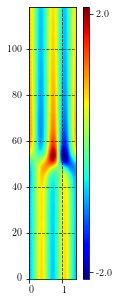

In [10]:
smallest_L_merger.plot()

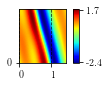

In [11]:
largest_L_merger.plot()

In [12]:
orbit_list = []
for orbit_h5 in glob.glob('../data/continuation/merge_tile/*.h5'):
    orbit_list.append(read_h5('../'+orbit_h5))

In [13]:
wd_list = []
for orbit1, orbit2 in np.array(list(itertools.product(orbit_list, orbit_list))):
    wd_list.append(gudhi_distance(orbit1, orbit2, metric='wasserstein_distance'))

KeyboardInterrupt: 

In [ ]:
plt.matshow(np.reshape(wd_list, (53, 53)), cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
wd_list_bd = []
for orbit1, orbit2 in np.array(list(itertools.product(orbit_list, orbit_list))):
    wd_list_bd.append(gudhi_distance(orbit1, orbit2, metric='bottleneck_distance'))

In [ ]:
plt.matshow(np.reshape(wd_list_bd, (53, 53)), cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
wd_list_hbd = []
for orbit1, orbit2 in np.array(list(itertools.product(orbit_list, orbit_list))):
    wd_list_hbd.append(gudhi_distance(orbit1, orbit2, metric='hera_bottleneck_distance'))

In [ ]:
plt.matshow(np.reshape(wd_list_hbd, (53, 53)), cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
parameter_list = []
for o in orbit_list:
    parameter_list.extend(o.orbit_parameters)

In [ ]:
X, Y, Z = np.reshape(parameter_list, (-1, 3)).transpose()

In [ ]:
# X = X.reshape(-1,1)
# Y = Y.reshape(-1,1)
# Z = Z.reshape(-1,1)

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
# ax.scatter3D(X.reshape(-1,1), Y.reshape(-1,1),  Z.reshape(-1,1))
# ax.plot_surface(X.reshape(-1,1), Y.reshape(-1,1), Z.reshape(-1,1))
ax.scatter(X, Y, Z)
ax.scatter(X[40], Y[40], Z[40], s=50, c='red') 

plt.show()